In [2]:
# Collection of map plotting functions

import numpy as np
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs

import cartopy.feature as cf
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from cartopy.io import shapereader
from shapely.geometry import LinearRing

import sys
sys.path.append('/Users/kenzatazi/Documents/CDT/Code')

from load import data_dir 

In [44]:
plt.rcParams['font.size'] = 14

In [45]:

def global_map(uib_only=False, bs_only=False):
    """ Return global map with study area(s) superimposed."""
    # UIB shapefile
    uib_path = data_dir + "Shapefiles/UpperIndus_HP_shapefile/UpperIndus_HP.shp"
    uib_shape = shapereader.Reader(uib_path)

    # Beas + Sutlej shapefile and projection
    bs_path = data_dir+ "Shapefiles/beas-sutlej-shapefile/12500Ha.shp"
    bs_shape = shapereader.Reader(bs_path)
    bs_globe = ccrs.Globe(semimajor_axis=6377276.345,
                          inverse_flattening=300.8017)
    cranfield_crs = ccrs.LambertConformal(
        central_longitude=82, central_latitude=20, false_easting=2000000.0,
        false_northing=2000000.0, standard_parallels=[12.47294444444444,
                                                      35.17280555555556],
        globe=bs_globe)

    plt.figure()
    ax = plt.subplot(projection=ccrs.PlateCarree(central_longitude=70))
    ax.coastlines("50m", linewidth=0.5)

    if bs_only is False:
        for rec in uib_shape.records():
            ax.add_geometries(
                [rec.geometry],
                ccrs.AlbersEqualArea(
                    central_longitude=125, central_latitude=-15,
                    standard_parallels=(7, -32)),
                edgecolor=None,
                facecolor="red",
                alpha=0.1)

    if uib_only is False:
        for rec in bs_shape.records():
            ax.add_geometries(
                [rec.geometry],
                cranfield_crs,
                edgecolor=None,
                facecolor="green",
                alpha=0.1)

    plt.show()

In [46]:
def indus_map():
    """Return two maps: global map, zoomed in map of the Upper Indus Basin."""

    # River shapefiles
    fpath = data_dir + "Shapefiles/ne_50m_rivers_lake_centerlines_scale_rank/ne_50m_rivers_lake_centerlines_scale_rank.shp"
    as_shp = shapereader.Reader(fpath)

    # UIB shapefile
    uib_path = data_dir + "Shapefiles/UpperIndus_HP_shapefile/UpperIndus_HP.shp"
    uib_shape = shapereader.Reader(uib_path)
    """"
    # Beas shapefile and projection
    beas_path = data_dir + "Shapefiles/beas-sutlej-shapefile/beas_sutlej_basins/beas_watershed.shp"
    beas_shape = shapereader.Reader(beas_path)
    beas_globe = ccrs.Globe(semimajor_axis=6377276.345,
                            inverse_flattening=300.8017)
    beas_cranfield_crs = ccrs.LambertConformal(
        central_longitude=80, central_latitude=23, false_easting=0.0,
        false_northing=0.0, standard_parallels=[30, 30], globe=beas_globe)
   
    # Sutlej shapefile and projection
    stlj_path = data_dir + "Shapefiles/beas-sutlej-shapefile/beas_sutlej_basins/sutlej_watershed.shp"
    stlj_shape = shapereader.Reader(stlj_path)
    stlj_globe = ccrs.Globe(semimajor_axis=6377276.345,
                            inverse_flattening=300.8017)
    stlj_cranfield_crs = ccrs.LambertConformal(
        central_longitude=80, central_latitude=23, false_easting=0.0,
        false_northing=0.0, standard_parallels=[30, 30], globe=stlj_globe)
    """
    # Other phyical features
    land_50m = cf.NaturalEarthFeature(
        "physical", "land", "50m", edgecolor="face",
        facecolor=cf.COLORS["land"])
    ocean_50m = cf.NaturalEarthFeature(
        "physical", "ocean", "50m", edgecolor="face",
        facecolor=cf.COLORS["water"])

    # Regional rectangle
    pgon = regional_rectangle(60, 85, 20, 40)

    # Projection for global map
    glb_proj = ccrs.NearsidePerspective(
        central_longitude=70, central_latitude=30)

    plt.figure("Global")
    ax = plt.subplot(projection=glb_proj)
    ax.add_feature(ocean_50m)
    ax.add_feature(land_50m)
    ax.coastlines("50m", linewidth=0.4)
    ax.add_feature(cf.BORDERS, linewidth=0.4)
    ax.add_geometries([pgon], crs=ccrs.PlateCarree(), linewidth=2,
                      facecolor="none", edgecolor="#359478")
    plt.savefig('Indus_map_global.pdf', bbox_inches='tight')

    fig1 = plt.figure("Zoomed in",)
    ax1 = plt.subplot(projection=ccrs.PlateCarree())
    ax1.set_extent([60, 85, 20, 40])

    ax1.add_feature(land_50m)
    ax1.add_feature(ocean_50m)
    ax1.add_feature(cf.BORDERS.with_scale("50m"), linewidth=0.5)
    ax1.coastlines("50m", linewidth=0.5)

    for rec in uib_shape.records():
        ax1.add_geometries(
            [rec.geometry],
            ccrs.AlbersEqualArea(central_longitude=125, central_latitude=-15,
                                 standard_parallels=(7, -32)),
            edgecolor="#359478",
            facecolor="#359478",
            alpha=0.2,
        )
    """
    for rec in beas_shape.records():
        ax.add_geometries(
            [rec.geometry],
            beas_cranfield_crs,
            edgecolor="green",
            facecolor="green",
            alpha=0.1,
        )

    for rec in stlj_shape.records():
        ax.add_geometries(
            [rec.geometry],
            stlj_cranfield_crs,
            edgecolor="blue",
            facecolor="blue",
            alpha=0.1,
        )

    # ax.add_feature(rivers)
    """
    for rec in as_shp.records():
        if (rec.attributes["name"] == "Indus") : #|  (rec.attributes["name"] == 'Beas') | (rec.attributes["name"] == 'Sutlej'):
            ax1.add_geometries(
                [rec.geometry],
                ccrs.PlateCarree(),
                edgecolor="steelblue",
                facecolor="None",
            )
        pass

    ax1.text(63.25, 28, "PAKISTAN", c="gray")
    ax1.text(61.75, 33.5, "AFGHANISTAN", c="gray")
    ax1.text(80, 37, "CHINA", c="gray")
    ax1.text(77, 25, "INDIA", c="gray")
    ax1.text(61, 22, "Arabian Sea", c="navy", alpha=0.5)
    ax1.text(68.5 , 30, "Indus river", c="steelblue", rotation=55, size=12)

    ax1.set_xticks([60, 65, 70, 75, 80, 85])
    ax1.set_xticklabels(["60°E", "65°E", "70°E", "75°E", "80°E", "85°E"])

    ax1.set_yticks([20, 25, 30, 35, 40])
    ax1.set_yticklabels(["20°N", "25°N", "30°N", "35°N", "40°N"])

    #plt.title("Indus River \n \n")
    plt.savefig('Indus_map_zoomed.pdf', bbox_inches='tight', )
    plt.show()
    return fig1



def regional_rectangle(lonmin, lonmax, latmin, latmax, nvert=100):
    """ Return Polygon object to create regional rectangle on maps."""
    lons = np.r_[
        np.linspace(lonmin, lonmin, nvert),
        np.linspace(lonmin, lonmax, nvert),
        np.linspace(lonmax, lonmax, nvert),
    ].tolist()

    lats = np.r_[
        np.linspace(latmin, latmax, nvert),
        np.linspace(latmax, latmax, nvert),
        np.linspace(latmax, latmin, nvert),
    ].tolist()

    pgon = LinearRing(list(zip(lons, lats)))

    return pgon

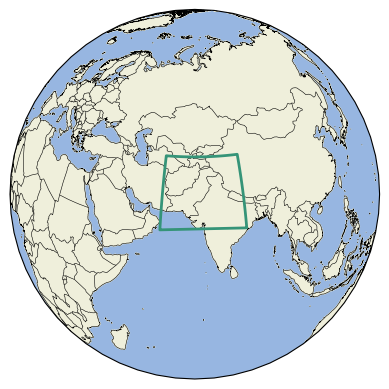

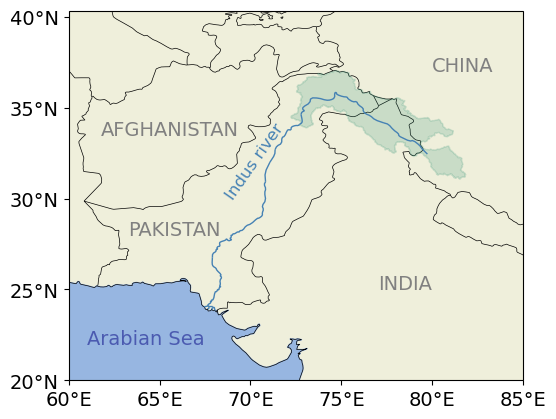

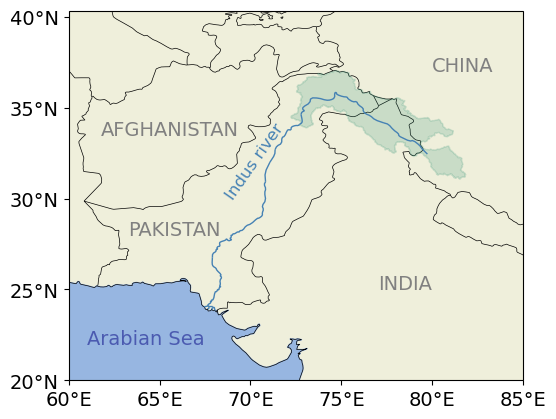

In [48]:
#plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.family'] = 'sans'
indus_map()